Predicted Clicked Ads


In [71]:
## Import Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from collections import defaultdict
#import ppscore as pps

from warnings import filterwarnings
filterwarnings('ignore')

## Data Preparation

### Data Load

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/dharmazz/Predict-Customer-Clicked-Ads-Classification-/main/Clicked%20Ads%20Dataset.csv")
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [41]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [42]:
df.select_dtypes('object').describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


### Exploratory Data Analysis

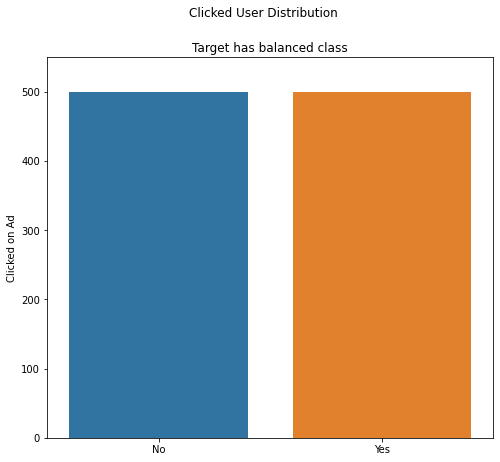

In [43]:
# Clicked on Ads Distribution
counts = df['Clicked on Ad'].value_counts()

plt.figure(figsize=(8,7))

sns.barplot(x=counts.index,y=counts)

plt.suptitle('Clicked User Distribution')
plt.title('Target has balanced class')
plt.ylim(0,550)
plt.show()

Data that have been used already balanced.

In [44]:
yes = df[df['Clicked on Ad'] == 'Yes']
no = df[df['Clicked on Ad'] == 'No']

#### Age

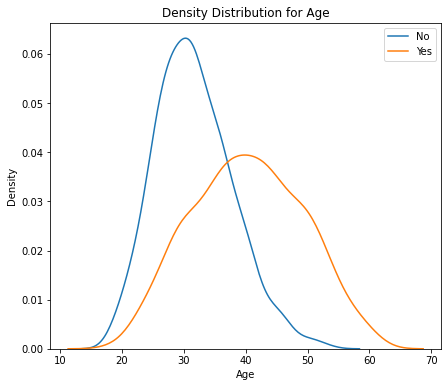

In [45]:
plt.figure(figsize=(7,6))

sns.kdeplot(no['Age'],label='No')
sns.kdeplot(yes['Age'],label='Yes')

plt.title('Density Distribution for Age')
plt.legend()
plt.show()

From the visualization, we know that the potential market is for the old group.

#### Daily Internet Usage

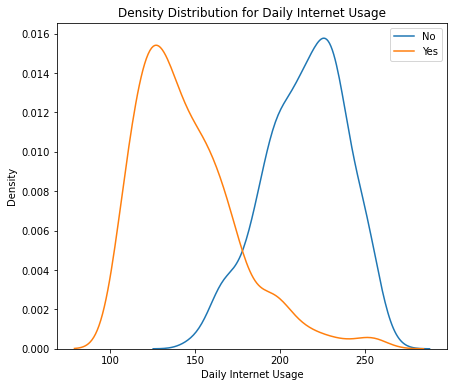

In [46]:
plt.figure(figsize=(7,6))

sns.kdeplot(no['Daily Internet Usage'],label='No')
sns.kdeplot(yes['Daily Internet Usage'],label='Yes')

plt.title('Density Distribution for Daily Internet Usage')
plt.legend()
plt.show()

From the visualization, there is an interesting insight. Users that rarely used the internet are more often click the product ads rather than users that usually used the internet.
- This insight indicate that users who rarely used the internet are more likely see the ads on website.

#### Daily Time Spent on Site

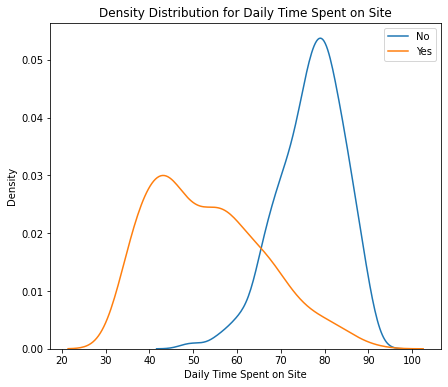

In [47]:
plt.figure(figsize=(7,6))

sns.kdeplot(no['Daily Time Spent on Site'],label='No')
sns.kdeplot(yes['Daily Time Spent on Site'],label='Yes')

plt.title('Density Distribution for Daily Time Spent on Site')
plt.legend()
plt.show()

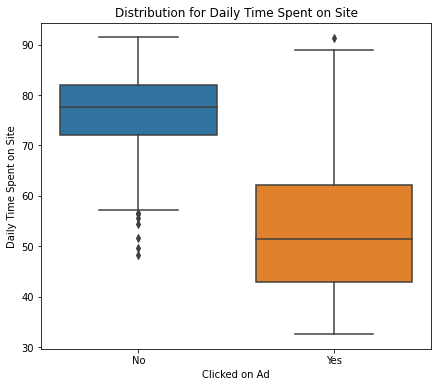

In [48]:
plt.figure(figsize=(7,6))

sns.boxplot(x=df['Clicked on Ad'],y=df['Daily Time Spent on Site'])

plt.title('Distribution for Daily Time Spent on Site')
plt.show()

From the boxplot, we know that the potential users are the users that spend their time on internet relatively short in time.

#### Internet Usage vs Time Spent on Site

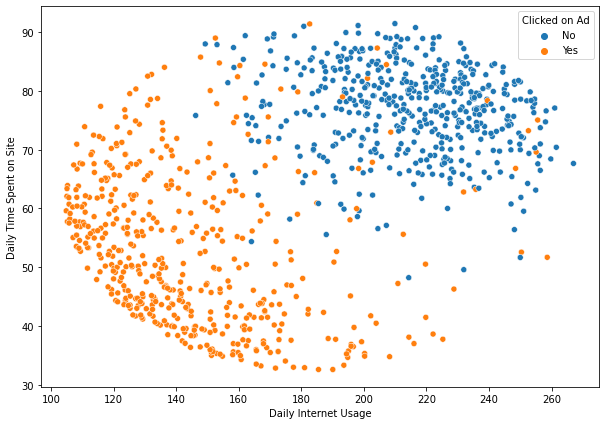

In [49]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Daily Internet Usage'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'])
#plt.title("Internet Usage vs Time Spent on Site")

plt.show()

From the correlation plot, we can see that the users are segmented into two parts active users and non-active users. From this plot, we can know that we should target the non-active users for better engagement.

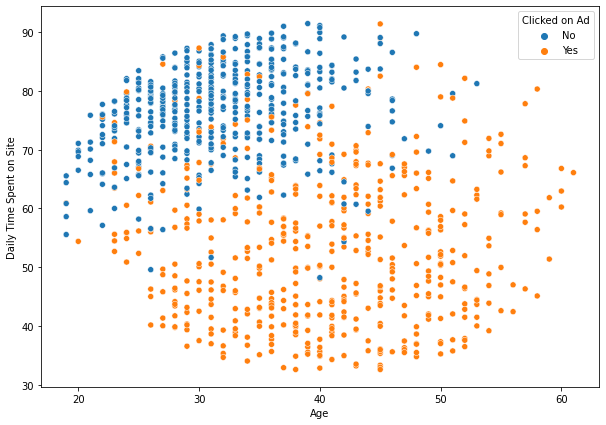

In [50]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Age'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'])
#plt.title("Internet Usage vs Time Spent on Site")

plt.show()

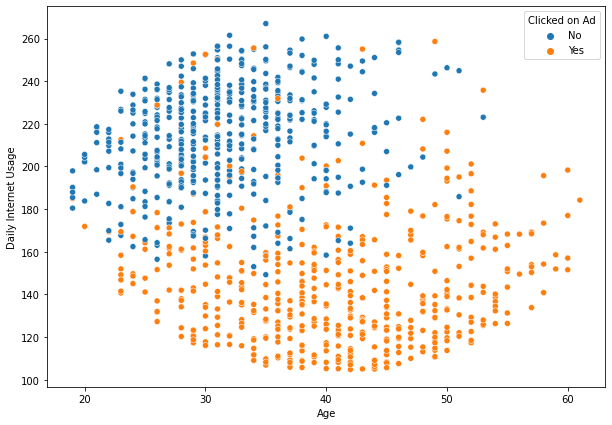

In [51]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Age'],y=df['Daily Internet Usage'],hue=df['Clicked on Ad'])
#plt.title("Internet Usage vs Time Spent on Site")

plt.show()

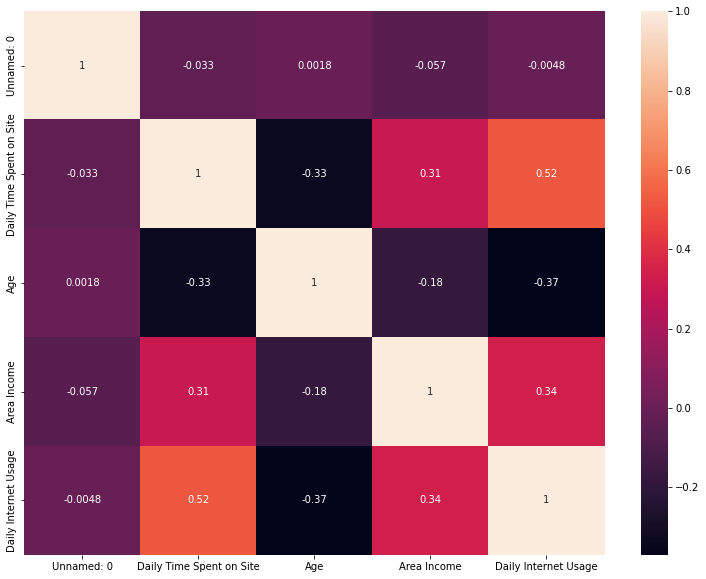

In [52]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the correlation, we know that there is no multicollinearity so we can use all the features in the dataset.

In [53]:
!pip install -U ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import ppscore as pps

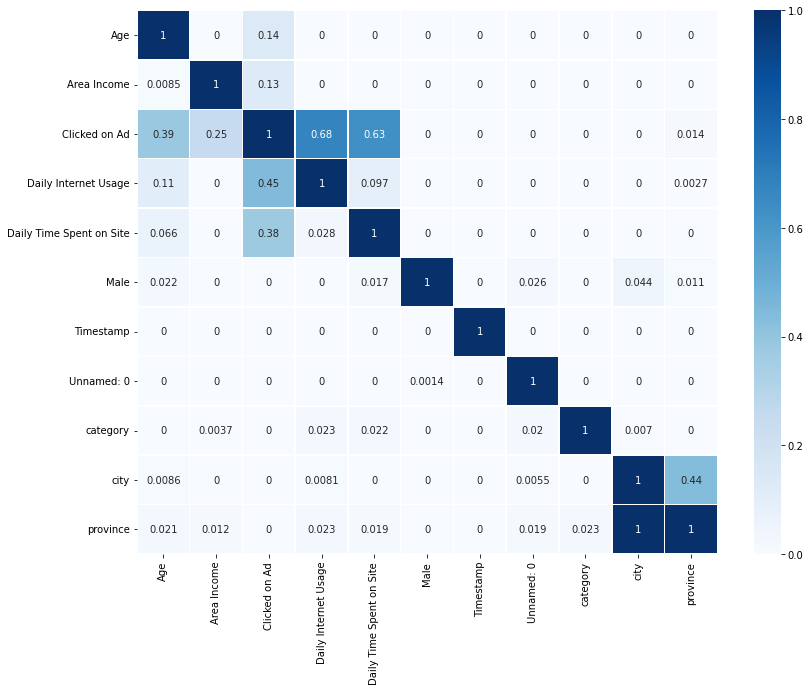

In [55]:
#Correlation Using PPScore
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

From the PPS, we can see that feature that correlate with our target are:
- Age
- Area Income
- Daily Internet Usage
- Daily Time Spent on Site

## Data Preprocessing

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [57]:
df.duplicated().any()

False

### Handle Missing Value

In [58]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(),inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(),inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(),inplace=True)
df['Male'].fillna(df['Male'].mode()[0],inplace=True)

### Extract Date Time

In [59]:
def extract_day_of_week(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').weekday()

def extract_day_of_month(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').day

def extract_month(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').month


In [60]:
df['day_of_week'] = df['Timestamp'].apply(extract_day_of_week)
df['day_of_month'] = df['Timestamp'].apply(extract_day_of_month)
df['month'] = df['Timestamp'].apply(extract_month)

df = df.drop(labels=['Timestamp'],axis=1)

### Split Train and Test

In [95]:
X = df.drop(labels= ['Clicked on Ad','Unnamed: 0'], axis =1)
y = np.where(df['Clicked on Ad']=='No',0,1)

### Dummies for Categorical Features

In [96]:
X_dummy = pd.get_dummies(X)
X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Daily Time Spent on Site                1000 non-null   float64
 1   Age                                     1000 non-null   int64  
 2   Area Income                             1000 non-null   float64
 3   Daily Internet Usage                    1000 non-null   float64
 4   day_of_week                             1000 non-null   int64  
 5   day_of_month                            1000 non-null   int64  
 6   month                                   1000 non-null   int64  
 7   Male_Laki-Laki                          1000 non-null   uint8  
 8   Male_Perempuan                          1000 non-null   uint8  
 9   city_Balikpapan                         1000 non-null   uint8  
 10  city_Bandar Lampung                     1000 non-null   uint8

## Modeling

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y,test_size = 0.3,stratify=y,random_state = 123)

In [98]:
## UDF for experimenting several classification models
def experiment(X_train,X_test,y_train,y_test):
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    ada = AdaBoostClassifier()
    svc = SVC()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad),
                  ('Ada Boost', ada),
                  ('SVC',svc)
                 ]
    
    for model_name,model in list_model:
        model.fit(X_train,y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        
    return result

In [99]:
result = experiment(X_train,X_test,y_train,y_test)
result = pd.DataFrame(result)

In [109]:
result

,model_name,model,accuracy,recall,precision
0,K-Nearest Neighbor,KNeighborsClassifier(),0.696667,0.640000,0.721805
1,Logistic Regression,LogisticRegression(),0.500000,0.000000,0.000000
2,Decision Tree,DecisionTreeClassifier(),0.946667,0.926667,0.965278
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.940000,0.920000,0.958333
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.933333,0.913333,0.951389
5,Ada Boost,"(DecisionTreeClassifier(max_depth=1, random_st...",0.940000,0.913333,0.964789
6,SVC,SVC(),0.723333,0.566667,0.825243


From the results, we know that Decision Tree has the highest accuracy with 0.943. Random Forest, Gradient Boosting, and Adaboost also has high accuracy.
- Logistic Regression, KNN, SVC has bad results

#### Result 2

In [101]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [102]:
result2 = experiment(X_train_minmax,X_test_minmax,y_train,y_test)
result2 = pd.DataFrame(result2)

In [103]:
result2

,model_name,model,accuracy,recall,precision
0,K-Nearest Neighbor,KNeighborsClassifier(),0.800000,0.740000,0.840909
1,Logistic Regression,LogisticRegression(),0.940000,0.900000,0.978261
2,Decision Tree,DecisionTreeClassifier(),0.940000,0.926667,0.952055
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.946667,0.926667,0.965278
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.930000,0.913333,0.944828
5,Ada Boost,"(DecisionTreeClassifier(max_depth=1, random_st...",0.940000,0.913333,0.964789
6,SVC,SVC(),0.940000,0.900000,0.978261


After doing the normalization, we can see that there is a significant increase in our model. Random Forest has the highest accuracy. 
- The significant increase happens with Logistic Regression and SVC

### Evaluation

In [104]:
final_model = result2['model'][3]
y_pred = final_model.predict(X_test_minmax)

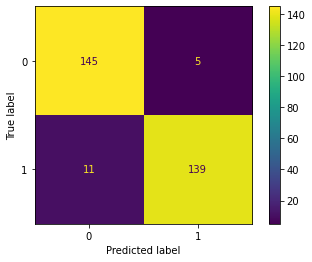

In [105]:
cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)

disp.plot()
plt.show()

We can see better the prediction by using the confusion matrix. From this matrix, we can see the wrong prediction is relatively small by using Random Forest. So, we can get good accuracy, precision, and recall.

#### Feature Importances

In [106]:
feature_imp = {}

feature_imp['columns'] = X_train.columns
feature_imp['feature_imp'] = result2['model'][3].feature_importances_

In [107]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'],ascending=False).head(20)

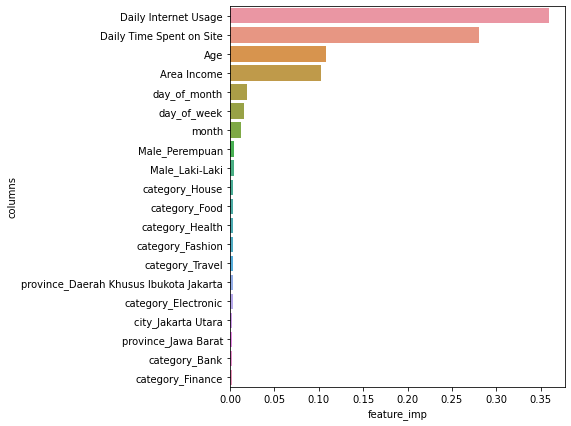

In [108]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_feature_imp['feature_imp'],y=df_feature_imp['columns'])

From the feature importances from Random Forest, we can know that daily internet usage and daily time spent on site are the important features to predict whether the users will click ads or not.

## Business Recommendation

From EDA and feature importance, we can conclude several things:
1. We have 2 kind of users that we can seperate into active and inactive users.
- Active users have criteria use internet often, young age, high salary
- Non active users are the contrary.
2. Users with the low class income are more likely to click the product on digital ads.
3. Users who usually use the internet are more difficult to be our potential users because they are already familiar with digital ads.
4. Older people are our potential users

Business takeaway:
1. We can use soft selling to target the users
2. We can use content mainstream to get the low income people.


### Simulation

Assumption:
- We need Rp 10,000 for our budget
- We can use 300 users that divided into two class
- We can gain Rp 12,000 

In [110]:
# Ammount of class
jum_class = pd.Series(y_test).value_counts()
jum_class

1    150
0    150
dtype: int64

Simulation:

1. Without Machine Learning Model
    * We will use our budget averagely 300 * 10,000 = 3M rupiah for advertisment
    * **Cost=3M**
    * Our conversion rate is 50%
    * We can gain 150 * 12,000 = 1.8M
    * **Revenue=1.8M**
    * **Profit=1.8-3=-1.2M**
    * Based on our simulation, if we do not use machine learning model, we will get  **potential loss: 1.2M rupiah**

2. With Machine Learning Model
    * We will do the advertisment only for users who potentially clicked the ads (prediction = 1).
    * We will use the budget around 144 * 10k = 1.44M rupiah to do the advertisment
    * **Cost=1.44jt**
    * Our conversion rate: 139/144 = 96.527%
    * From 144 users that we predict, there will be 139 users who convert 
    * We will get 139 * 12,000 = 1.668jt
    * **Revenue=1.668jt**
    * **Profit=1.668-1.46=228k**
    * From the simulation, if we use machine learning we will get  **potential revenue: 228k rupiah**